In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import tensorflow as tf
import pickle
import os

In [81]:
import dataset_utils
from glob import glob

In [82]:
DATA_DIR = "pointnet_data"
NUM_POINTS = 100
NUM_CLASSES = 2
BATCH_SIZE = 32
train_points, test_points, train_labels, test_labels, CLASS_MAP = dataset_utils.parse_dataset(NUM_POINTS, DATA_DIR)

processing class: standing
processing class: sitting


In [83]:
print(train_points)

[[[-4.399e-01  2.570e+00  9.727e-01 -2.505e-01  2.240e+02]
  [-5.420e-01  2.561e+00  1.252e+00 -3.757e-01  2.810e+02]
  [-8.057e-01  3.117e+00  8.516e-01  5.010e-01  2.880e+02]
  ...
  [-5.503e-01  2.578e+00  1.606e+00 -5.010e-01  2.600e+02]
  [-9.092e-01  3.297e+00  4.648e-01  5.010e-01  2.340e+02]
  [-7.285e-01  3.258e+00  8.496e-01  5.010e-01  3.400e+02]]

 [[-7.461e-01  3.445e+00  4.014e-01  3.757e-01  2.210e+02]
  [-7.461e-01  3.184e+00  6.299e-01  3.757e-01  2.370e+02]
  [-8.574e-01  3.324e+00  5.352e-01  3.757e-01  2.260e+02]
  ...
  [-7.124e-01  2.531e+00  1.045e+00 -8.765e-01  2.830e+02]
  [-7.061e-01  2.961e+00  6.855e-01  5.010e-01  2.190e+02]
  [-8.320e-01  3.082e+00  8.369e-01  5.010e-01  2.910e+02]]

 [[-5.088e-01  2.898e+00  6.611e-01 -3.757e-01  3.150e+02]
  [-3.567e-01  2.311e+00  6.377e-01 -8.765e-01  2.970e+02]
  [-6.973e-01  3.061e+00  8.848e-01  3.757e-01  3.450e+02]
  ...
  [-5.088e-01  3.215e+00  6.094e-01 -6.260e-01  3.150e+02]
  [-4.727e-01  2.451e+00  1.364e+0

In [84]:
print(test_points)

[[[ 1.5254e+00  3.7148e+00  1.2061e+00 -3.7573e-01  3.4300e+02]
  [ 1.4375e+00  3.8496e+00  9.6777e-01 -2.5049e-01  3.0600e+02]
  [ 1.7812e+00  3.8359e+00  6.4746e-01  0.0000e+00  1.6700e+02]
  ...
  [ 1.4375e+00  3.7520e+00  1.2500e+00 -2.5049e-01  3.0700e+02]
  [ 1.5762e+00  3.8398e+00  1.1211e+00 -2.5049e-01  3.5200e+02]
  [ 1.9121e+00  4.0430e+00  6.2109e-01  3.7573e-01  2.4400e+02]]

 [[-4.4727e-01  3.0977e+00  6.0938e-01 -5.0098e-01  2.9600e+02]
  [-3.9941e-01  3.2852e+00  8.0664e-01 -6.2598e-01  3.0700e+02]
  [ 1.5801e+00  4.0352e+00  6.4648e-01  0.0000e+00  1.2200e+02]
  ...
  [-3.6426e-01  2.9805e+00  6.7578e-01 -6.2598e-01  2.7500e+02]
  [-4.2188e-01  3.0391e+00  1.0625e+00 -6.2598e-01  2.3500e+02]
  [ 1.4863e+00  3.7656e+00  1.2695e+00 -2.5049e-01  2.6400e+02]]

 [[ 6.3184e-01  3.6562e+00  8.6328e-01 -2.5049e-01  2.4700e+02]
  [ 5.2734e-01  3.5234e+00  1.0723e+00 -3.7573e-01  3.2600e+02]
  [ 1.4746e+00  3.9473e+00  5.9082e-01 -2.5049e-01  1.8900e+02]
  ...
  [-3.2617e-01  3.

In [85]:
train_points = train_points[:, :, :3]
test_points = test_points[:, :, :3]
print(CLASS_MAP)

{0: 'standing', 1: 'sitting'}


In [86]:
print(train_points)

[[[-0.44    2.57    0.9727]
  [-0.542   2.56    1.252 ]
  [-0.8057  3.117   0.8516]
  ...
  [-0.5503  2.578   1.606 ]
  [-0.909   3.297   0.4648]
  [-0.7285  3.258   0.8496]]

 [[-0.746   3.445   0.4014]
  [-0.746   3.184   0.63  ]
  [-0.8574  3.324   0.535 ]
  ...
  [-0.7124  2.531   1.045 ]
  [-0.706   2.96    0.6855]
  [-0.832   3.082   0.837 ]]

 [[-0.509   2.898   0.661 ]
  [-0.3567  2.31    0.6377]
  [-0.6973  3.06    0.885 ]
  ...
  [-0.509   3.215   0.6094]
  [-0.4727  2.451   1.364 ]
  [-0.591   2.93    0.3945]]

 ...

 [[-0.6743  1.301   0.6973]
  [ 0.2197  1.994   0.2764]
  [-0.587   1.462   0.498 ]
  ...
  [-0.5547  1.778   0.3154]
  [-0.8     1.373   0.4697]
  [ 0.2148  3.547   1.24  ]]

 [[-0.658   1.673   0.6963]
  [-0.4944  1.511   0.3242]
  [-0.459   1.341   0.534 ]
  ...
  [ 0.1748  1.988   0.4492]
  [ 0.842   2.76    0.2812]
  [ 0.3643  1.438   0.3096]]

 [[ 0.4766  2.072   0.2334]
  [-0.6924  2.39    0.782 ]
  [-0.6445  1.583   0.3096]
  ...
  [-0.708   2.438   0.22

In [87]:
from tensorflow import data as tf_data
import keras
import PointNET

keras.utils.set_random_seed(seed=42)

In [88]:
train_size = 0.8
dataset = tf_data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf_data.Dataset.from_tensor_slices((test_points, test_labels))
train_dataset_size = int(len(dataset) * train_size)

dataset = dataset.shuffle(len(train_points)).map(PointNET.augment)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

train_dataset = dataset.take(train_dataset_size).batch(BATCH_SIZE)
validation_dataset = dataset.skip(train_dataset_size).batch(BATCH_SIZE)

In [89]:
import keras
import tensorflow as tf
from keras import ops
from keras import layers
from PointNET import tnet, conv_bn, dense_bn

In [90]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 100, 3)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_22 (Conv1D)  │ (None, 100, 32)   │        128 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 32)   │        128 │ conv1d_22[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_34       │ (None, 100, 32)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_23 (Conv1D)  │ (None, 100, 64)   │      2,112 │ activation_34[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 64)   │        256 │ conv1d_23[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_35       │ (None, 100, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_24 (Conv1D)  │ (None, 100, 512)  │     33,280 │ activation_35[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 512)  │      2,048 │ conv1d_24[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_36       │ (None, 100, 512)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ activation_36[0]… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 256)       │    131,328 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_18[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_37       │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 128)       │     32,896 │ activation_37[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_19[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_38       │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 9)         │      1,161 │ activation_38[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_4 (Reshape) │ (None, 3, 3)      │          0 │ dense_20[0][0]  

 Total params: 747,947 (2.85 MB)

 Trainable params: 741,867 (2.83 MB)

 Non-trainable params: 6,080 (23.75 KB)

In [91]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

model.fit(train_dataset, epochs=20, validation_data=validation_dataset)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 50.3020 - sparse_categorical_accuracy: 0.8466 - val_loss: 34.1024 - val_sparse_categorical_accuracy: 0.9810
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 34.6310 - sparse_categorical_accuracy: 0.9710 - val_loss: 33.9619 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 34.3041 - sparse_categorical_accuracy: 0.9897 - val_loss: 33.6262 - val_sparse_categorical_accuracy: 0.9937
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 34.1493 - sparse_categorical_accuracy: 0.9876 - val_loss: 34.1804 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 34.0529 - sparse_categorical_accuracy: 0.9966 - val_loss: 33.4778 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 34.1496 - sparse_categorical_accuracy: 0.9995 - val_loss: 33.2942 - val_sparse_categorical_accuracy: 1.000

In [92]:
from matplotlib import pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
[[[ 0.1982  1.628   0.3672]
  [-0.5215  1.41    0.5225]
  [-0.425   1.523   0.4053]
  ...
  [ 0.1982  1.843   0.579 ]
  [-0.8     1.714   0.418 ]
  [-0.7373  1.188   0.6035]]

 [[-0.631   2.508   1.219 ]
  [-0.3047  3.328   0.758 ]
  [-0.4785  2.742   0.5967]
  ...
  [ 0.6445  3.492   1.226 ]
  [-0.5166  2.135   1.502 ]
  [ 0.4644  3.605   0.9395]]

 [[ 0.4236  3.422   0.8184]
  [-0.336   3.486   0.9824]
  [ 0.1494  3.393   0.5117]
  ...
  [ 1.716   3.762   0.6562]
  [ 1.525   3.715   1.206 ]
  [ 0.3608  3.393   0.867 ]]

 ...

 [[-0.5215  1.437   0.543 ]
  [ 0.2471  1.868   0.4287]
  [-0.8     1.257   0.6006]
  ...
  [-0.595   1.727   0.9023]
  [-0.583   1.537   0.507 ]
  [-0.8667  1.265   0.499 ]]

 [[-0.5996  1.502   0.712 ]
  [ 0.2305  1.7705  0.3887]
  [-0.5913  1.514   0.6025]
  ...
  [-0.65    1.633   0.4688]
  [-0.7373  1.188   0.6035]
  [ 0.1001  1.5625  0.6367]]

 [[ 0.4727  3.791   0.842 ]
  [-0.275   2.012   1.024 ]
  [-0.4087  1.386  

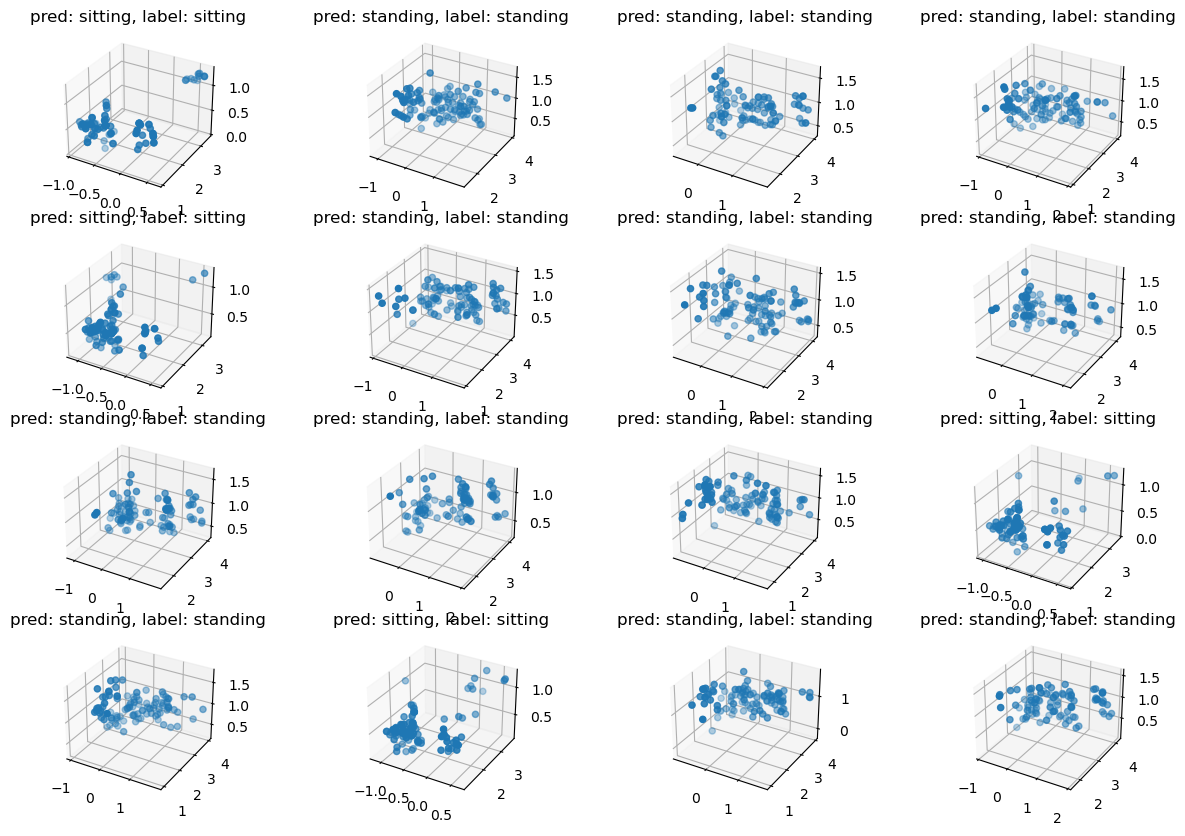

In [93]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:20, ...]
labels = labels[:20, ...]

# run test data through model
preds = model.predict(points)
preds = ops.argmax(preds, -1)

points = points.numpy()
print(points)

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_on()
plt.show()

In [94]:
predictions = []

for batch in np.array_split(test_points, len(test_points)//NUM_POINTS): 
    preds = model.predict(batch)
    preds = np.argmax(preds, axis=-1)
    predictions.extend(preds)

predictions = np.array(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


In [95]:
accuracy = np.sum(predictions == test_labels) / len(test_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.08%
